In [1]:
import ROOT
import math
import uproot
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/08


In [23]:
ttbar_pred       = np.loadtxt('DNN_pred/Mstop_242_5_mchi_60_tt_pred.txt')

ttbar_ljet_up    = np.loadtxt('Weights/ttbar/JES/JES_ljet_weight_up.txt')
ttbar_ljet_down  = np.loadtxt('Weights/ttbar/JES/JES_ljet_weight_down.txt')

ttbar_sljet_up   = np.loadtxt('Weights/ttbar/JES/JES_sljet_weight_up.txt')
ttbar_sljet_down = np.loadtxt('Weights/ttbar/JES/JES_sljet_weight_down.txt')

In [24]:
tt_JES_fin_up   = np.multiply(ttbar_ljet_up  , ttbar_sljet_up)
tt_JES_fin_down = np.multiply(ttbar_ljet_down, ttbar_sljet_down)

In [25]:
SUSY_pred       = np.loadtxt('DNN_pred/Mstop_242_5_mchi_60_SUSY_pred.txt')

SUSY_ljet_up    = np.loadtxt('Weights/SUSY/Mstop_242_5/JES/JES_ljet_weight_up.txt')
SUSY_ljet_down  = np.loadtxt('Weights/SUSY/Mstop_242_5/JES/JES_ljet_weight_down.txt')

SUSY_sljet_up   = np.loadtxt('Weights/SUSY/Mstop_242_5/JES/JES_sljet_weight_up.txt')
SUSY_sljet_down = np.loadtxt('Weights/SUSY/Mstop_242_5/JES/JES_sljet_weight_down.txt')

In [26]:
SUSY_JES_fin_up   = np.multiply(SUSY_ljet_up  , SUSY_sljet_up)
SUSY_JES_fin_down = np.multiply(SUSY_ljet_down, SUSY_sljet_down)

In [27]:
st_pred       = np.loadtxt('DNN_pred/Mstop_242_5_mchi_60_st_pred.txt')

st_ljet_up    = np.loadtxt('Weights/ST/JES/JES_ljet_weight_up.txt')
st_ljet_down  = np.loadtxt('Weights/ST/JES/JES_ljet_weight_down.txt')

st_sljet_up   = np.loadtxt('Weights/ST/JES/JES_sljet_weight_up.txt')
st_sljet_down = np.loadtxt('Weights/ST/JES/JES_sljet_weight_down.txt')

In [28]:
st_JES_fin_up   = np.multiply(st_ljet_up  , st_sljet_up)
st_JES_fin_down = np.multiply(st_ljet_down, st_sljet_down)

In [29]:
vv_pred       = np.loadtxt('DNN_pred/Mstop_242_5_mchi_60_vv_pred.txt')

vv_ljet_up    = np.loadtxt('Weights/VV/JES/JES_ljet_weight_up.txt')
vv_ljet_down  = np.loadtxt('Weights/VV/JES/JES_ljet_weight_down.txt')

vv_sljet_up   = np.loadtxt('Weights/VV/JES/JES_sljet_weight_up.txt')
vv_sljet_down = np.loadtxt('Weights/VV/JES/JES_sljet_weight_down.txt')

In [30]:
vv_JES_fin_up   = np.multiply(vv_ljet_up  , vv_sljet_up)
vv_JES_fin_down = np.multiply(vv_ljet_down, vv_sljet_down)

In [31]:
SUSY_mask = np.concatenate([np.zeros(15000, dtype=bool), np.ones(len(SUSY_pred), dtype=bool)])
tt_mask   = np.concatenate([np.zeros(30000, dtype=bool), np.ones(len(ttbar_pred), dtype=bool)])
st_mask   = np.concatenate([np.zeros(5000, dtype=bool), np.ones(len(st_pred), dtype=bool)])
vv_mask   = np.concatenate([np.zeros(2000, dtype=bool), np.ones(len(vv_pred), dtype=bool)])

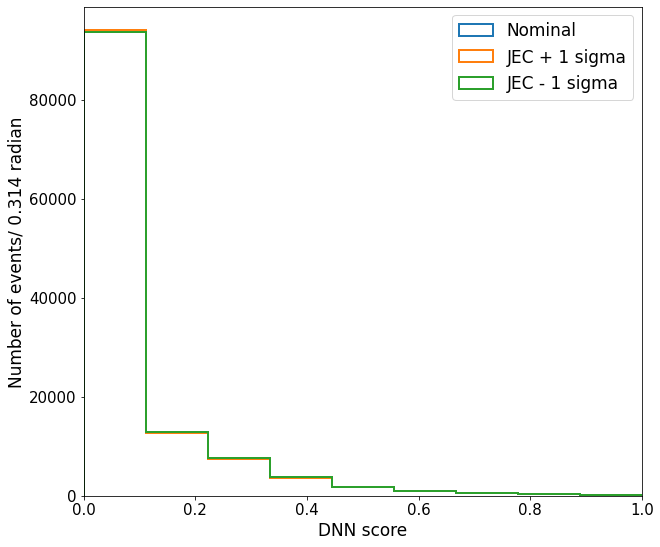

In [46]:
fig,ax  = plt.subplots(figsize=(10,9))
binning = np.linspace(0, 1, 10)

ns1,bins1,patches = ax.hist(st_pred, histtype='step', bins=binning, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(st_pred, histtype='step', bins=binning, label = 'JEC + 1 sigma', linewidth=2 , weights=st_JES_fin_up[st_mask == 1])
ns3,bins1,patches = ax.hist(st_pred, histtype='step', bins=binning, label = 'JEC - 1 sigma', linewidth=2 , weights=st_JES_fin_down[st_mask == 1])
ax.set_ylabel('Number of events/ 0.314 radian', fontsize=17)
ax.set_xlabel('DNN score', fontsize=17)
ax.set_xlim(0,1)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

In [35]:
h_ttbar_jes      = ROOT.TH1F('ttbar'        , 'ttbar'        , 15, 0 , 1)
h_ttbar_jes_up   = ROOT.TH1F('ttbar_jesUp'  , 'ttbar_jesUp'  , 15, 0 , 1)
h_ttbar_jes_down = ROOT.TH1F('ttbar_jesDown', 'ttbar_jesDown', 15, 0 , 1)

Warning in <TROOT::Append>: Replacing existing TH1: ttbar (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ttbar_jesUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ttbar_jesDown (Potential memory leak).


In [36]:
h_SUSY_jes      = ROOT.TH1F('SUSY'        , 'SUSY'        , 15, 0 , 1)
h_SUSY_jes_up   = ROOT.TH1F('SUSY_jesUp'  , 'SUSY_jesUp'  , 15, 0 , 1)
h_SUSY_jes_down = ROOT.TH1F('SUSY_jesDown', 'SUSY_jesDown', 15, 0 , 1)

Warning in <TROOT::Append>: Replacing existing TH1: SUSY (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: SUSY_jesUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: SUSY_jesDown (Potential memory leak).


In [37]:
h_st_jes       = ROOT.TH1F('st'        , 'st'        , 15, 0 , 1)
h_st_jes_up    = ROOT.TH1F('st_jesUp'  , 'st_jesUp'  , 15, 0 , 1)
h_st_jes_down  = ROOT.TH1F('st_jesDown', 'st_jesDown', 15, 0 , 1)

Warning in <TROOT::Append>: Replacing existing TH1: st (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: st_jesUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: st_jesDown (Potential memory leak).


In [38]:
h_vv_jes       = ROOT.TH1F('vv'        , 'vv'        , 15, 0 , 1)
h_vv_jes_up    = ROOT.TH1F('vv_jesUp'  , 'vv_jesUp'  , 15, 0 , 1)
h_vv_jes_down  = ROOT.TH1F('vv_jesDown', 'vv_jesDown', 15, 0 , 1)

Warning in <TROOT::Append>: Replacing existing TH1: vv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: vv_jesUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: vv_jesDown (Potential memory leak).


In [39]:
# This takes into account 
# events that were used for training

SUSY_train= 15000
tt_train  = 30000
st_train  = 5000
sat_train = 5000
vv_train  = 2000

tt_train_sf   = (tt_train  + len(ttbar_pred))/ len(ttbar_pred)
SUSY_train_sf = (SUSY_train + len(SUSY_pred))/ len(SUSY_pred)
st_train_sf   = (st_train  + len(st_pred))   / len(st_pred)
vv_train_sf   = (vv_train  + len(vv_pred))   / len(vv_pred)

In [40]:
opfile = ROOT.TFile('Mstop_242_5_shape.root', 'recreate')

In [41]:
# Fill in the tops
w_up   = tt_JES_fin_up[tt_mask == 1]
w_down = tt_JES_fin_down[tt_mask == 1]

for i in range(len(ttbar_pred)):
    h_ttbar_jes.Fill(ttbar_pred[i])
    h_ttbar_jes_up.Fill(ttbar_pred[i]  , w_up[i])
    h_ttbar_jes_down.Fill(ttbar_pred[i], w_down[i])

# Lumi scaling 

scale_tt  = 17.994815 * tt_train_sf
h_ttbar_jes.Scale(scale_tt)
h_ttbar_jes_up.Scale(scale_tt)
h_ttbar_jes_down.Scale(scale_tt)

In [42]:
# SUSY
# Fill in the SUSY 
sus_w_up   = SUSY_JES_fin_up[SUSY_mask == 1]
sus_w_down = SUSY_JES_fin_down[SUSY_mask == 1]

for i in range(len(SUSY_pred)):
    h_SUSY_jes.Fill(SUSY_pred[i])
    h_SUSY_jes_up.Fill(SUSY_pred[i]  , sus_w_up[i])
    h_SUSY_jes_down.Fill(SUSY_pred[i], sus_w_down[i])

# Lumi scaling

scale_SUSY= 14.389516 * SUSY_train_sf
h_SUSY_jes.Scale(scale_SUSY)
h_SUSY_jes_up.Scale(scale_SUSY)
h_SUSY_jes_down.Scale(scale_SUSY)

In [43]:
# Fill in the single top
st_w_up   = st_JES_fin_up[st_mask == 1]
st_w_down = st_JES_fin_down[st_mask == 1]

for i in range(len(st_pred)):
    h_st_jes.Fill(st_pred[i])
    h_st_jes_up.Fill(st_pred[i]  , st_w_up[i])
    h_st_jes_down.Fill(st_pred[i], st_w_down[i])

# Lumi scaling
scale_st  = 8.706901  * st_train_sf * 2 # For antitop
h_st_jes.Scale(scale_st)
h_st_jes_up.Scale(scale_st)
h_st_jes_down.Scale(scale_st)

In [44]:
# And finally the diboson
vv_w_up   = vv_JES_fin_up[vv_mask == 1]
vv_w_down = vv_JES_fin_down[vv_mask == 1]

for i in range(len(vv_pred)):
    h_vv_jes.Fill(vv_pred[i])
    h_vv_jes_up.Fill(vv_pred[i]  , vv_w_up[i])
    h_vv_jes_down.Fill(vv_pred[i], vv_w_down[i])

# Lumi scaling
scale_vv  = 2.580743  * vv_train_sf
h_vv_jes.Scale(scale_vv)
h_vv_jes_up.Scale(scale_vv)
h_vv_jes_down.Scale(scale_vv)

In [45]:
h_ttbar_jes.Write()
h_ttbar_jes_up.Write()
h_ttbar_jes_down.Write()

h_SUSY_jes.Write()
h_SUSY_jes_up.Write()
h_SUSY_jes_down.Write()

h_st_jes.Write()
h_st_jes_up.Write()
h_st_jes_down.Write()

h_vv_jes.Write()
h_vv_jes_up.Write()
h_vv_jes_down.Write()

opfile.Close()